In [7]:
# Import libs
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def solve_system(A, B, C, D):
    # Step (a): Rewrite as a linear algebraic system
    A_matrix = np.array([[A, -B], [C, -D]])
    
    # Step (b): Solve the eigenvalue problem
    eig_vals, eig_vecs = np.linalg.eig(A_matrix)
    
    # Step (c): Find the eigenvectors
    u1 = eig_vecs[:, 0]
    u2 = eig_vecs[:, 1]
    
    # Step (d): Find the solution of the system
    C1 = np.array([1, 1])
    # Need to check if it will throw an exception
    try:
        C2 = np.linalg.solve(np.array([u1, u2]).T, C1)
    except np.linalg.LinAlgError:
        return None, None
    
    # Get lambda into x and y
    x = lambda t: C2[0]*np.exp(eig_vals[0]*t)*u1[0] + C2[1]*np.exp(eig_vals[1]*t)*u2[0]
    y = lambda t: C2[0]*np.exp(eig_vals[0]*t)*u1[1] + C2[1]*np.exp(eig_vals[1]*t)*u2[1]
    
    # Return to plot later
    return x, y

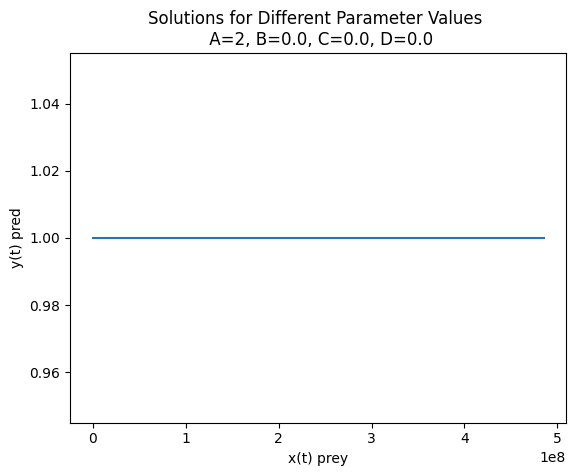

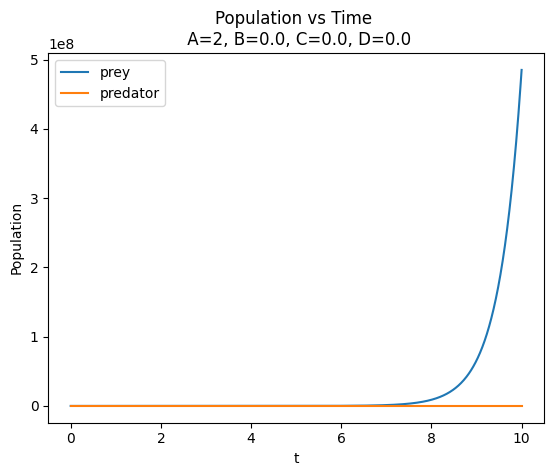

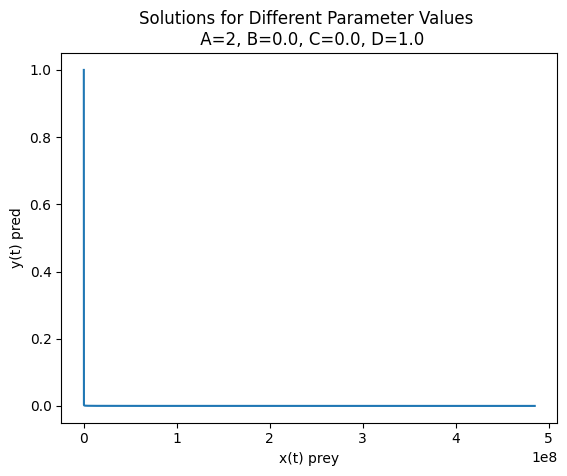

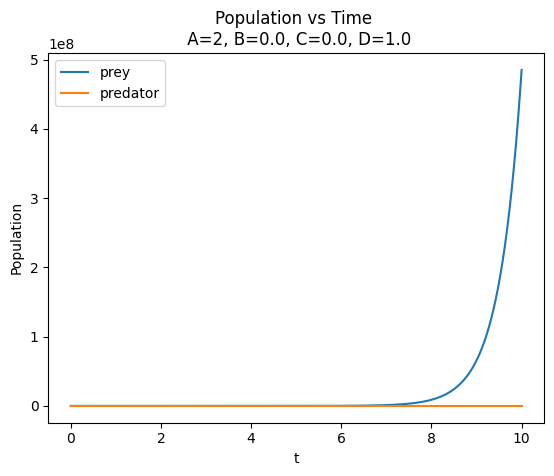

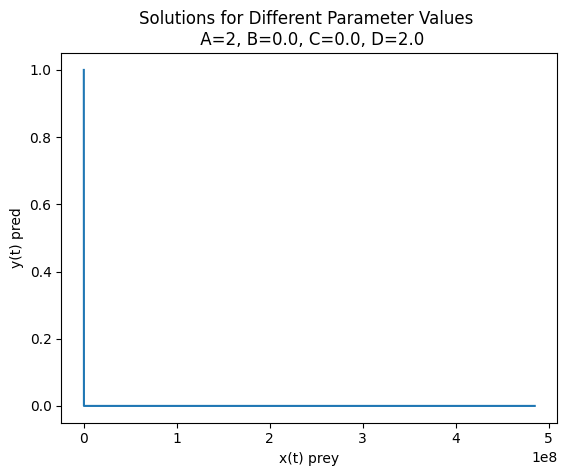

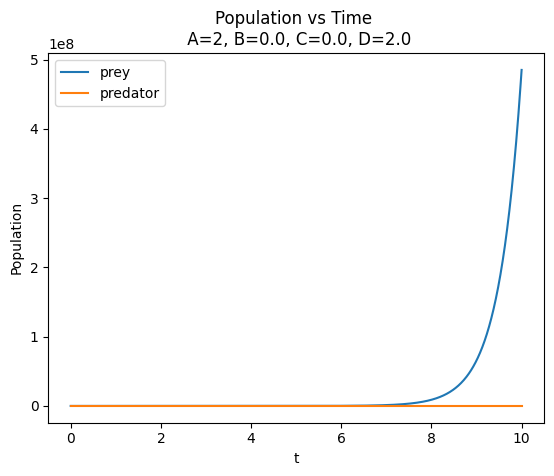

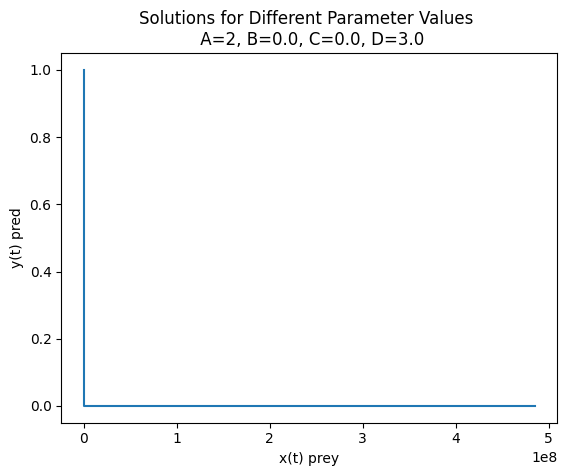

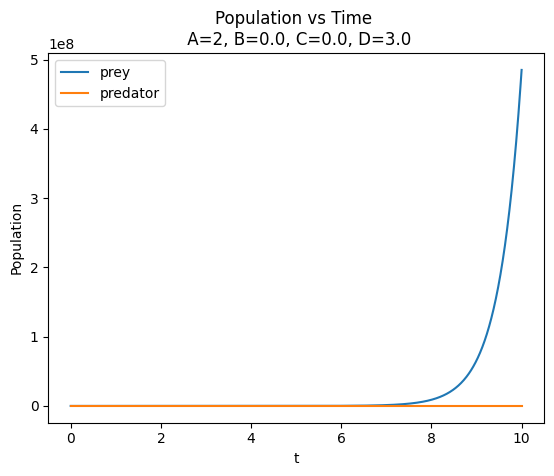

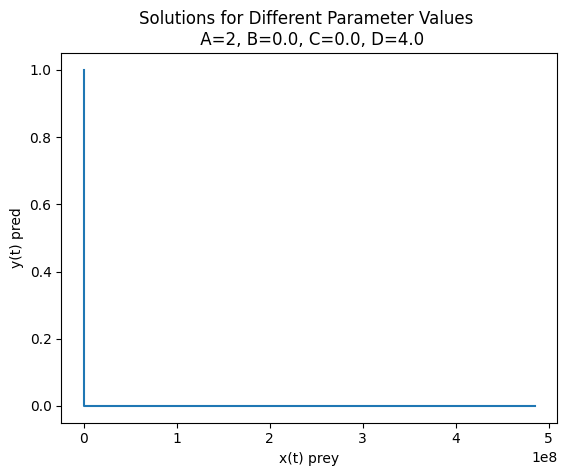

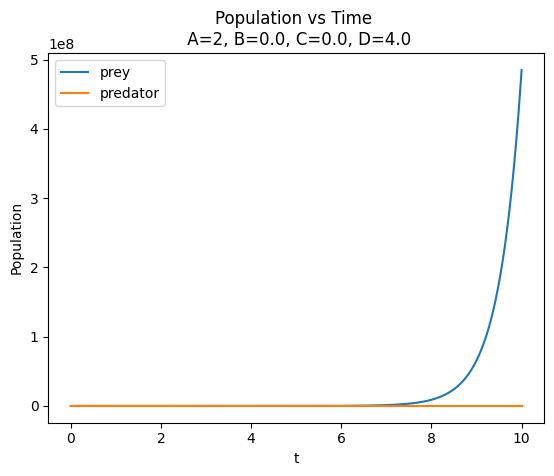

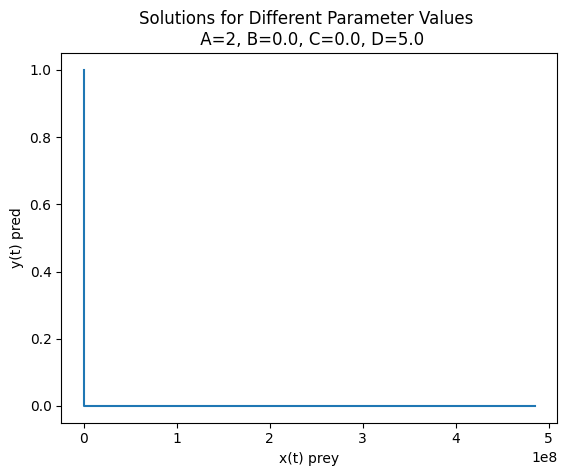

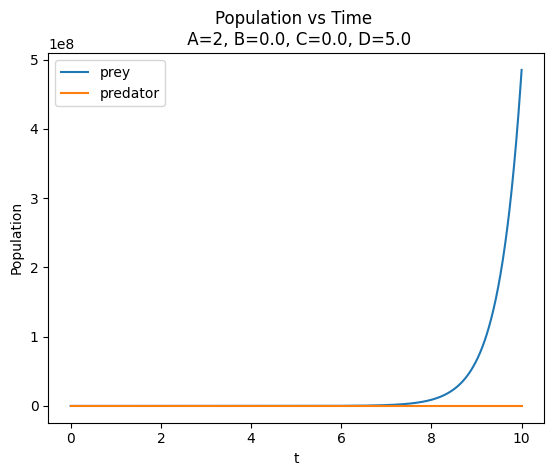

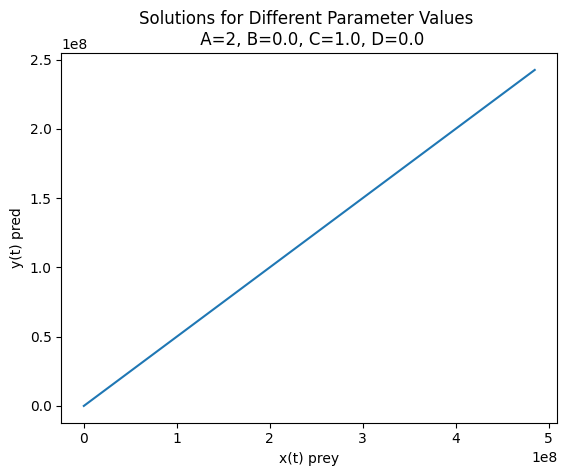

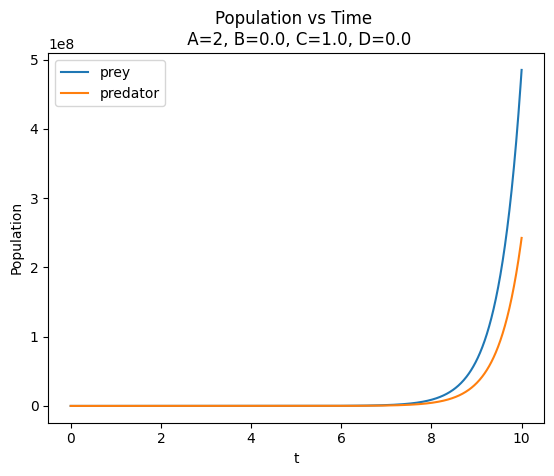

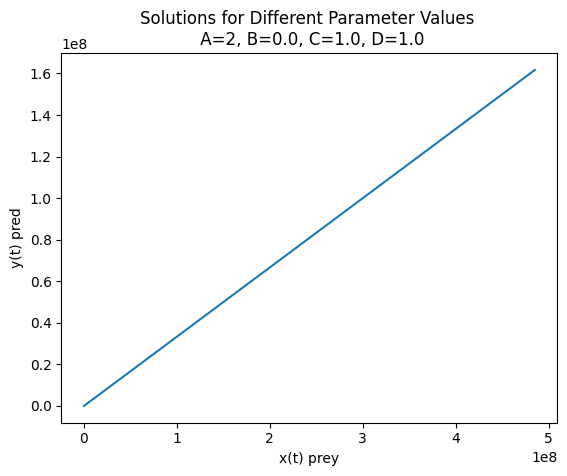

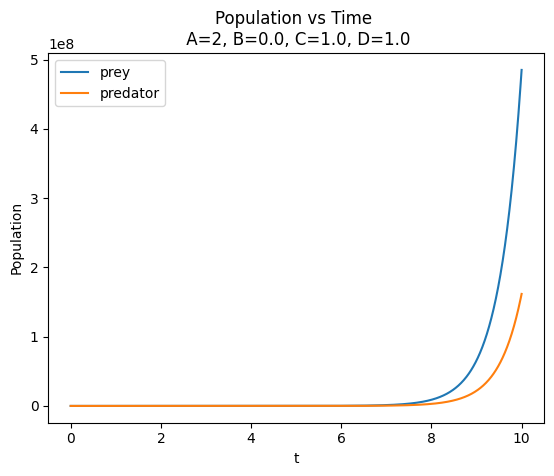

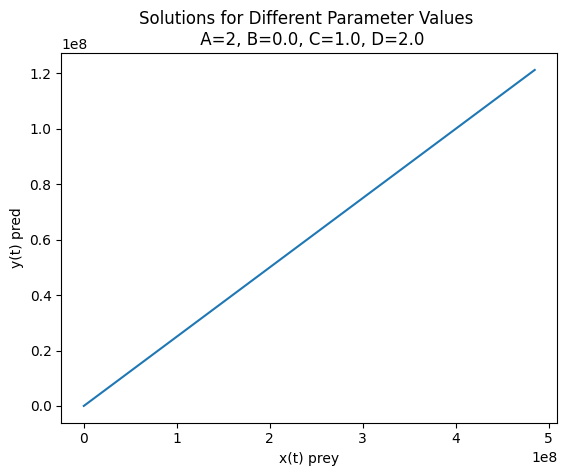

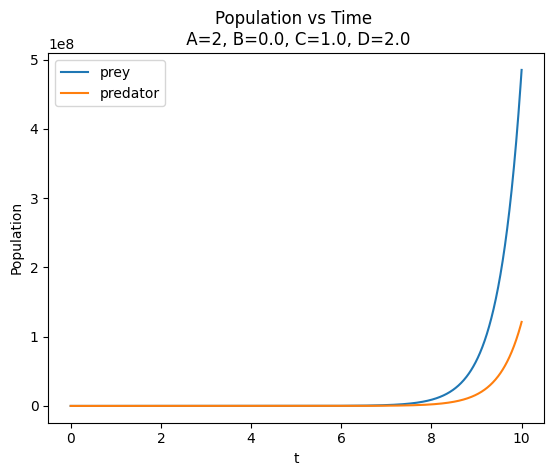

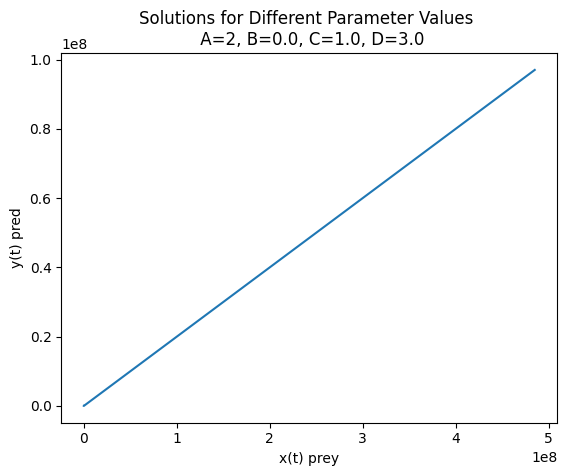

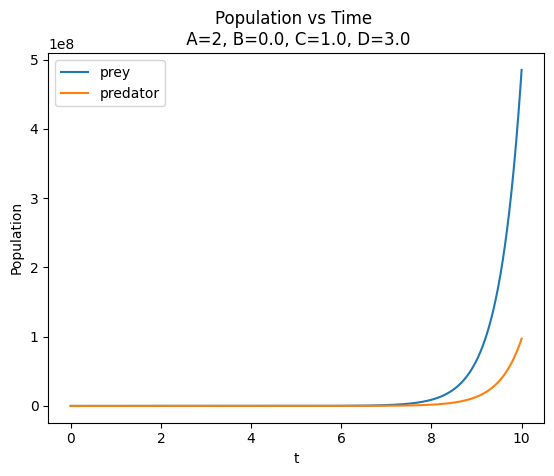

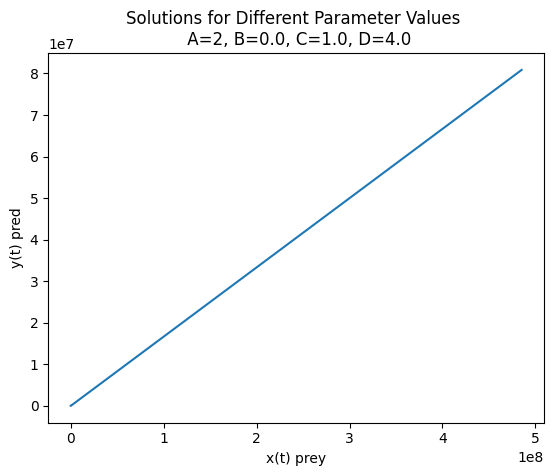

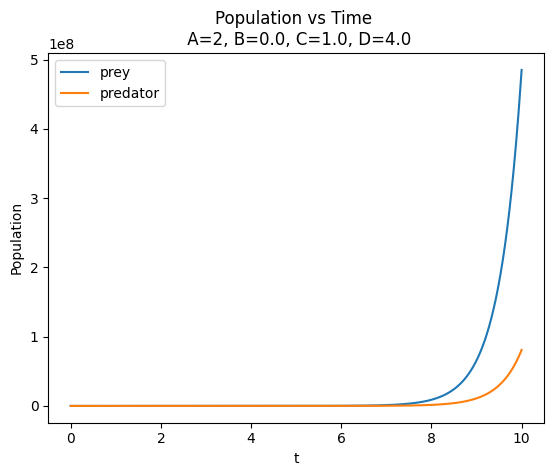

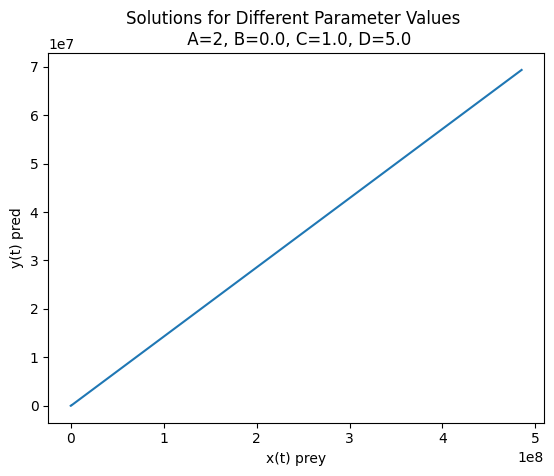

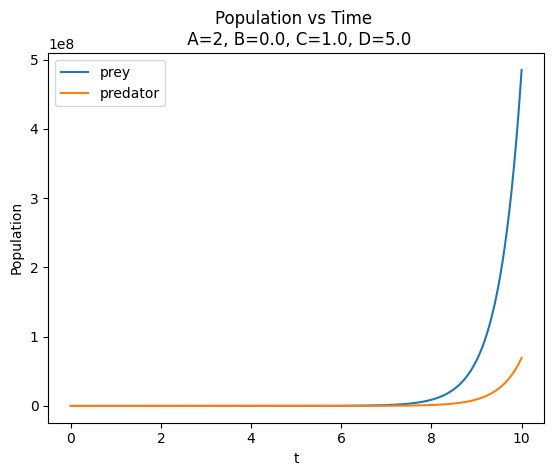

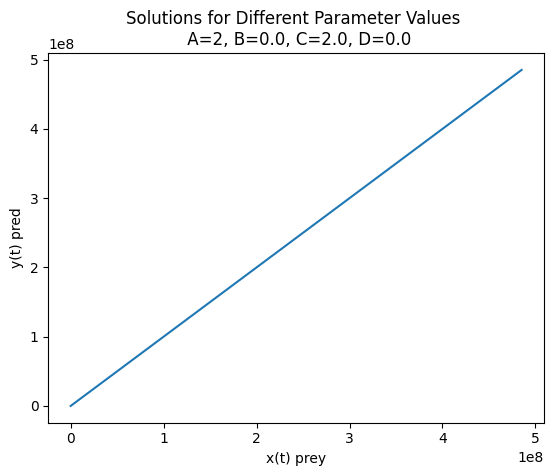

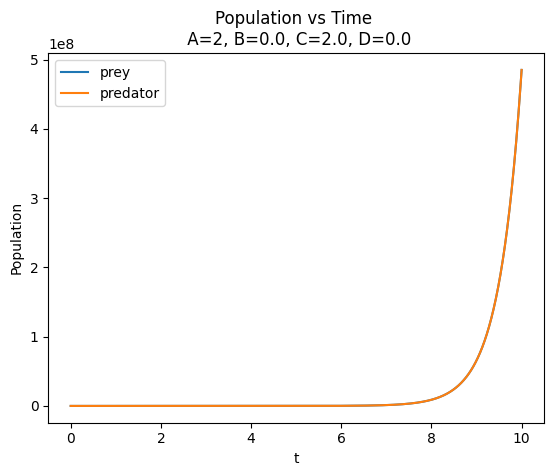

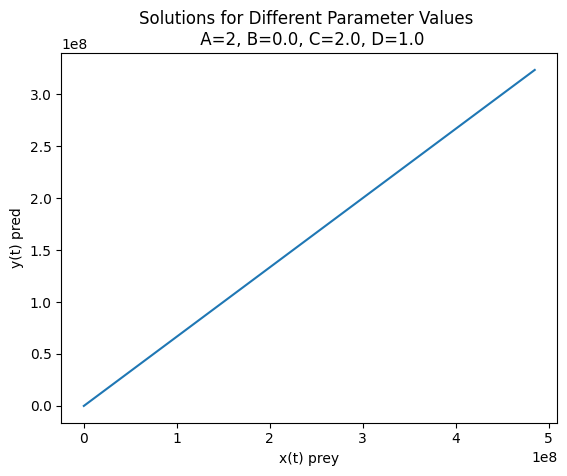

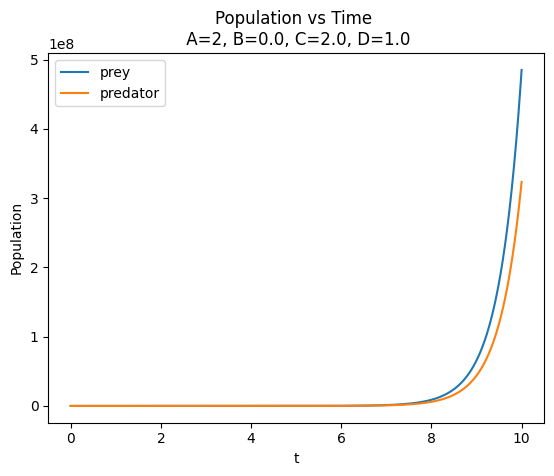

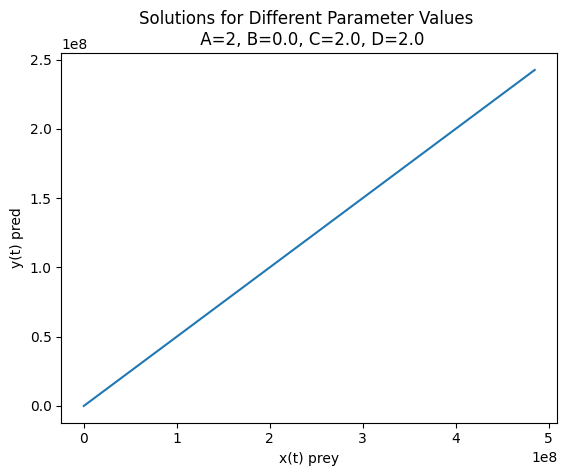

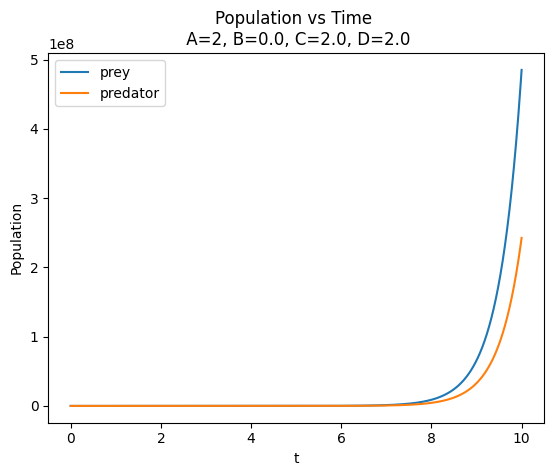

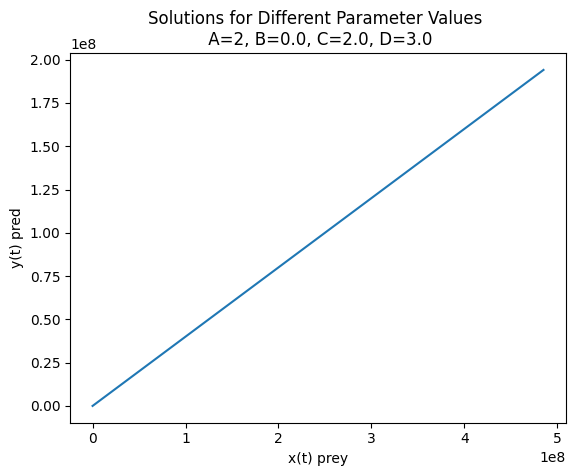

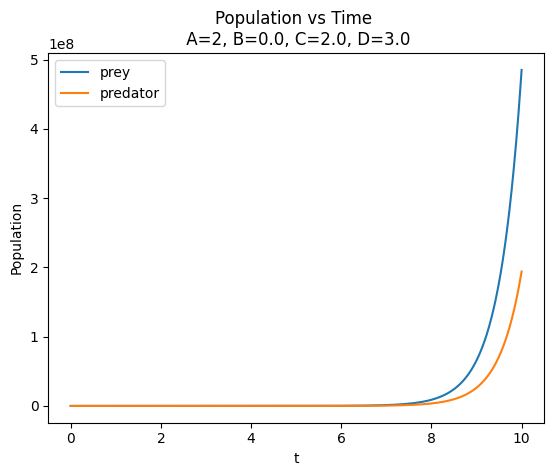

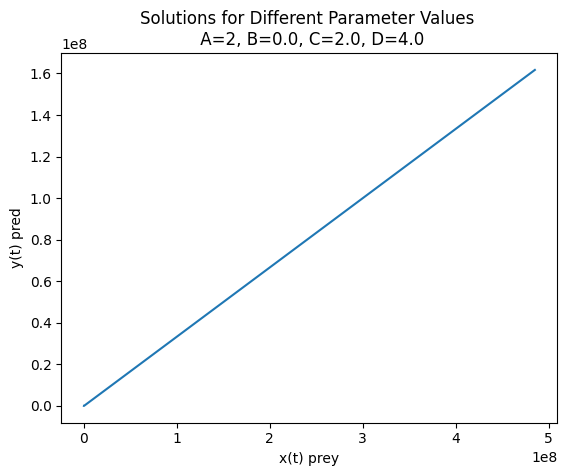

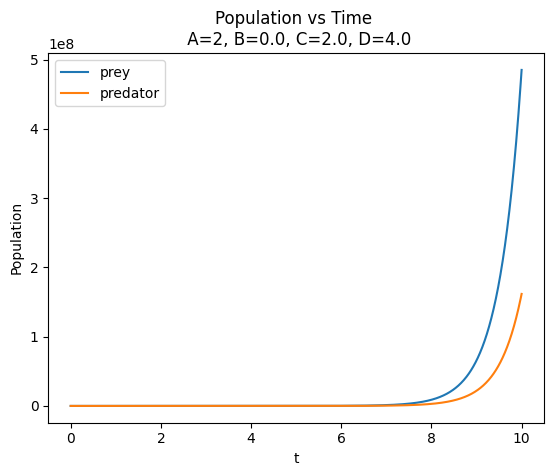

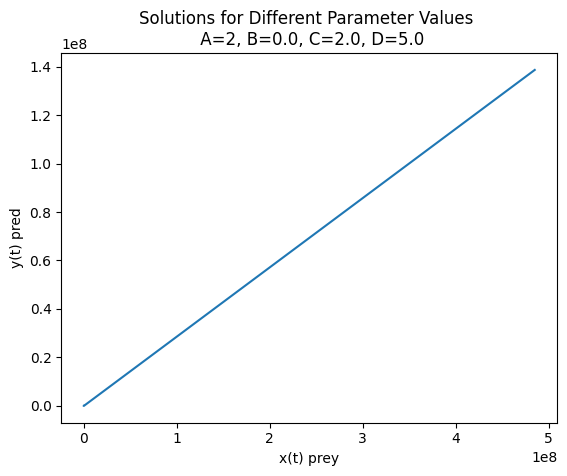

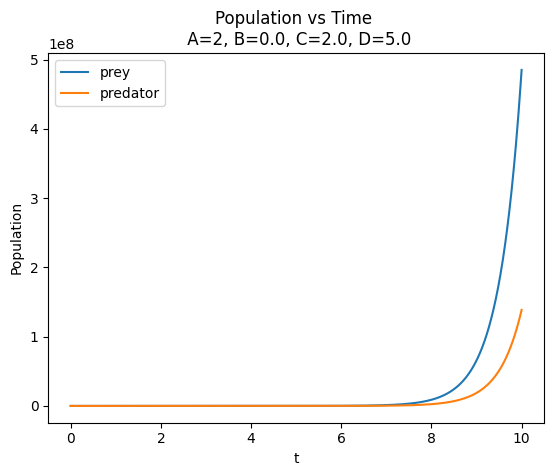

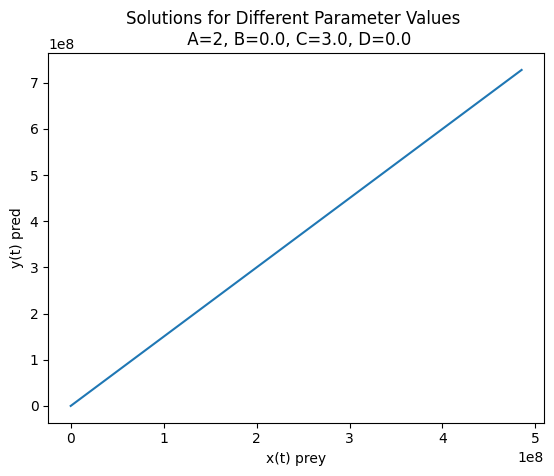

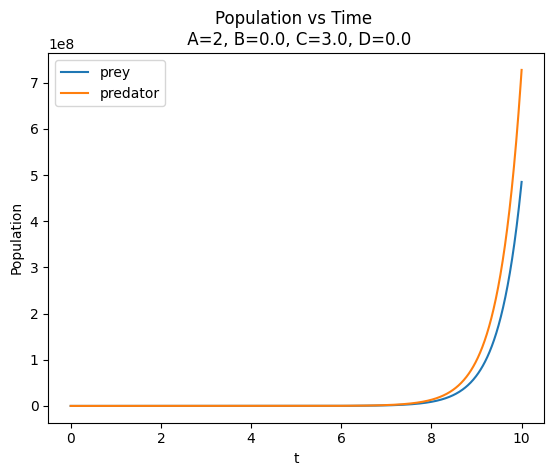

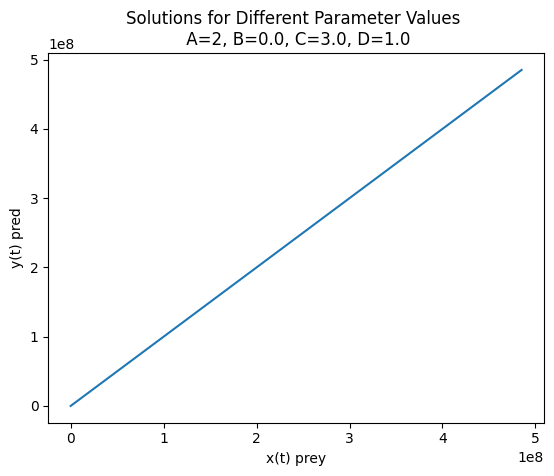

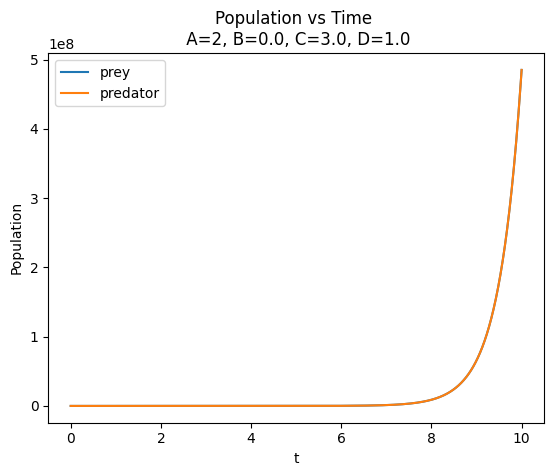

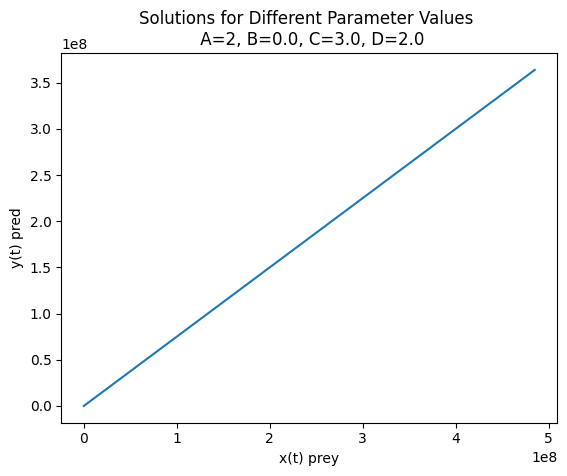

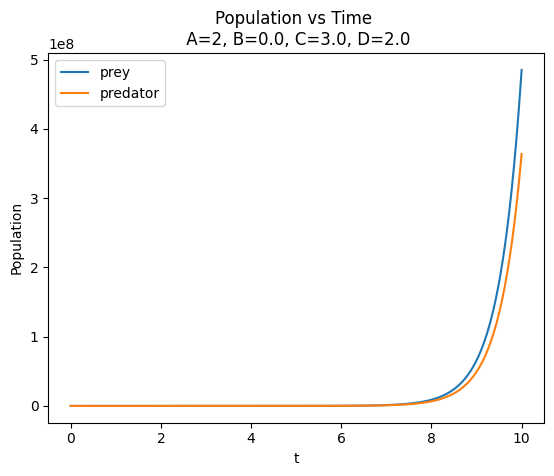

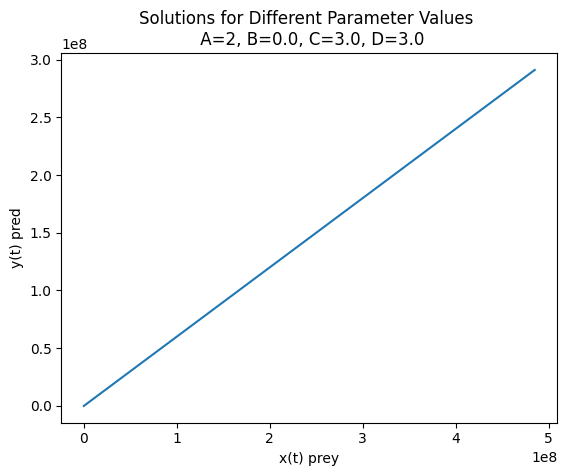

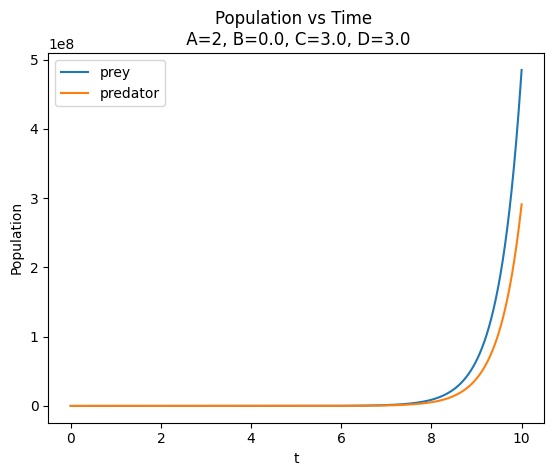

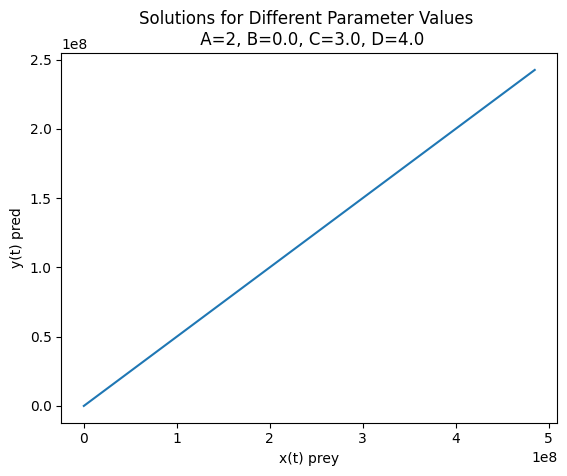

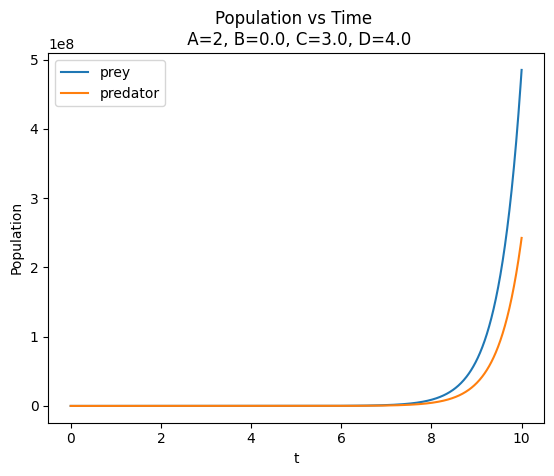

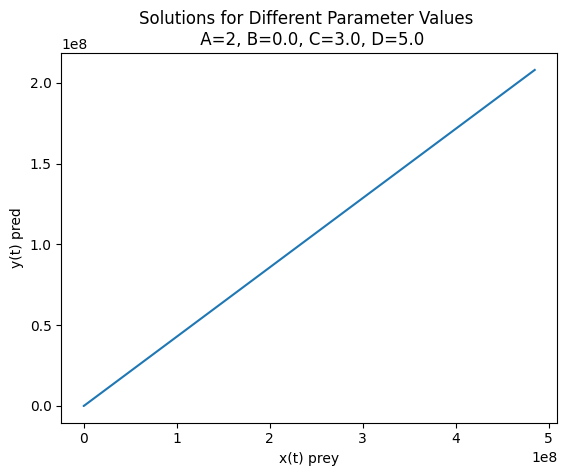

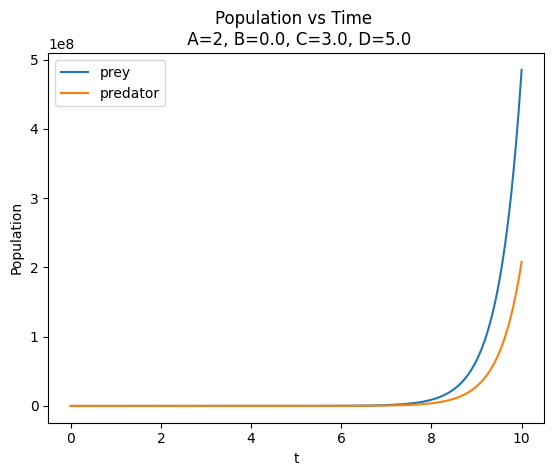

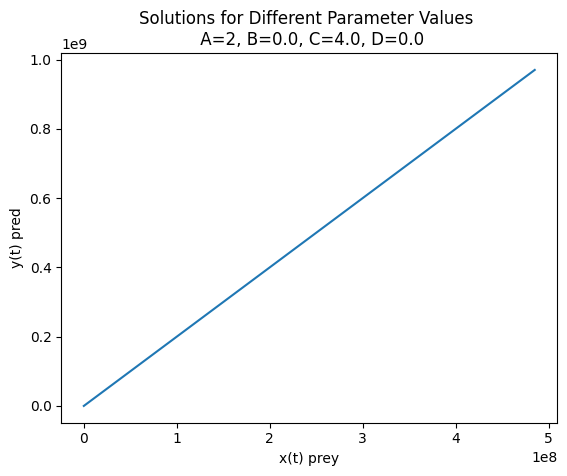

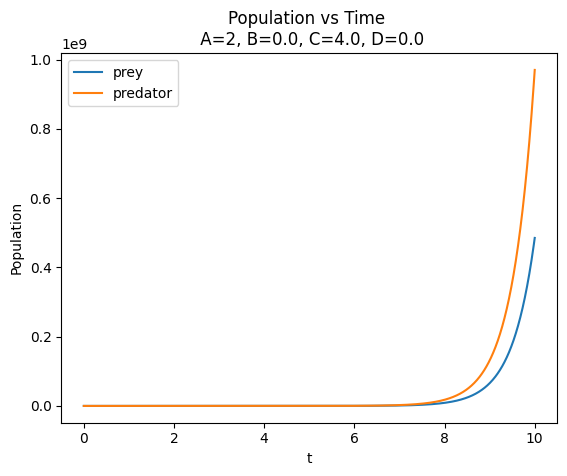

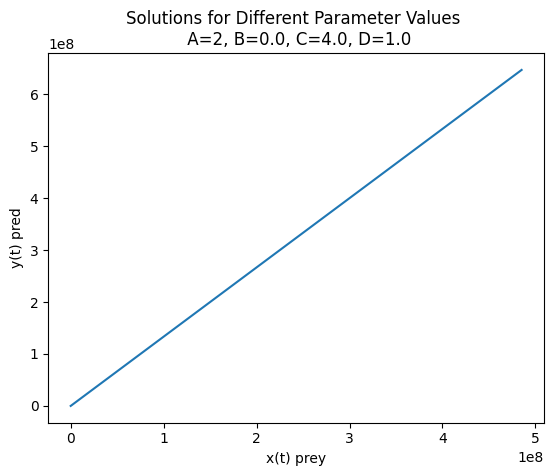

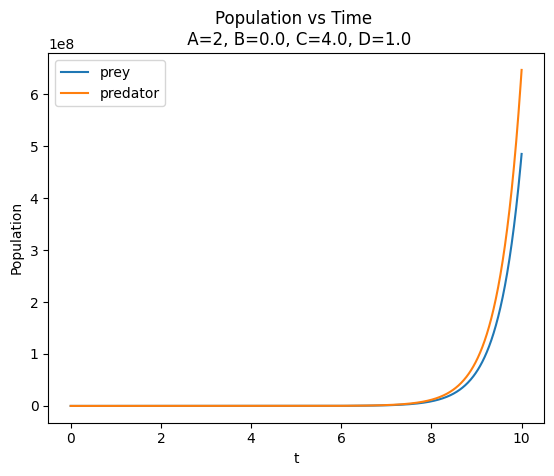

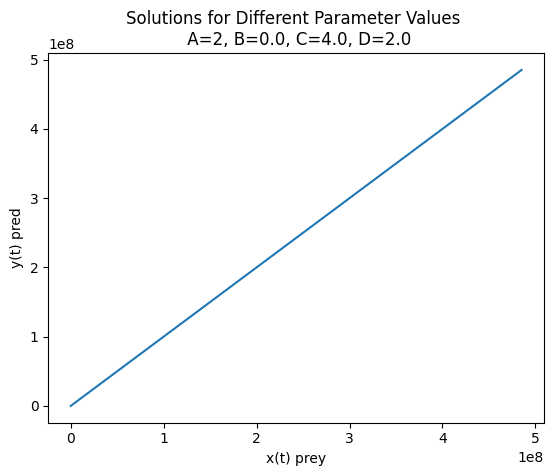

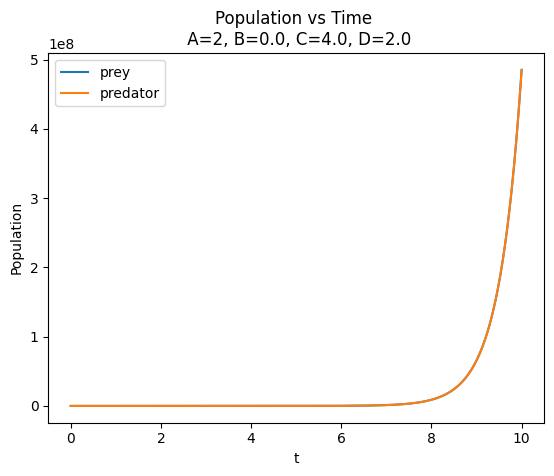

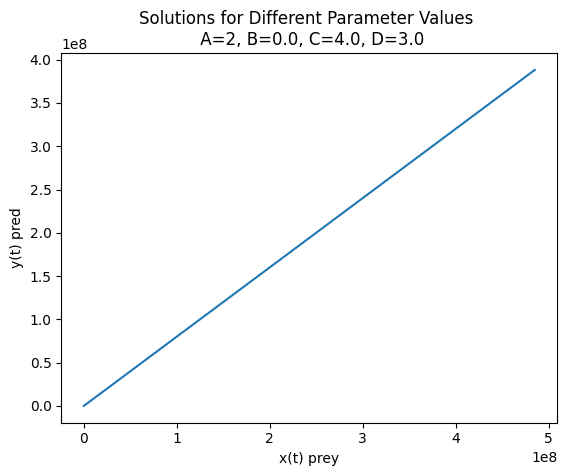

KeyboardInterrupt: 

In [9]:
# Step (e): Investigate all possible solutions for different values of parameters
ts = np.linspace(0, 10, 1000)
a = 0 # set the value of a
for b in np.linspace(0, 5, 6):
    for c in np.linspace(0, 5, 6):
        for d in np.linspace(0, 5, 6):
            x, y = solve_system(a, b, c, d)
            if x is not None and y is not None:
                x_vals = [x(t) for t in ts]
                y_vals = [y(t) for t in ts]

                # Output solutions for a plot
                plt.plot(x_vals, y_vals)
                plt.title(f'Solutions for Different Parameter Values \n A={a}, B={b}, C={c}, D={d}')
                plt.xlabel('x(t) prey')
                plt.ylabel('y(t) pred')
                plt.show()

                # plot of prey and predator populations
                prey_vals = [x(t) for t in ts]
                pred_vals = [y(t) for t in ts]
                plt.plot(ts, prey_vals, label='prey')
                plt.plot(ts, pred_vals, label='predator')
                plt.title(f'Population vs Time \n A={a}, B={b}, C={c}, D={d}')
                plt.xlabel('t')
                plt.ylabel('Population')
                plt.legend()
                plt.show()